In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [10]:
df = pd.read_csv(r"C:\Users\NANDU\Downloads\titanic\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.shape

(891, 12)

In [13]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
df = df.drop(columns='Cabin', axis=1)


In [17]:
# filling nan values with mean and applying one hot encoding to sex column
df.fillna(df['Fare'].mean(), inplace=True)
df.fillna(df['Age'].mean(), inplace=True)


In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,30.196762,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.040419,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

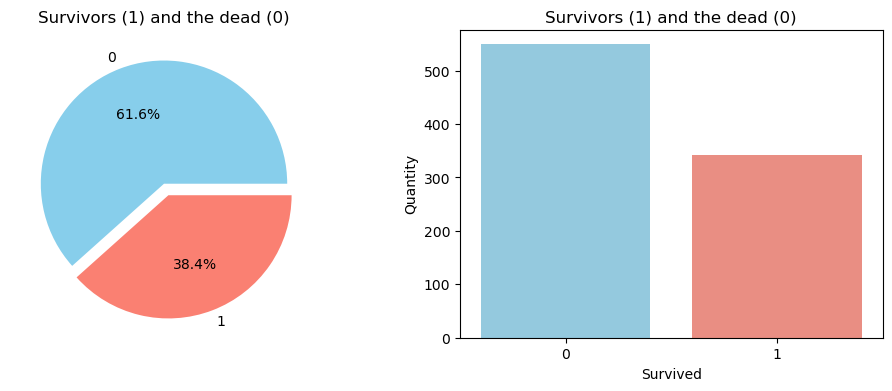

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Pie colors
pie_colors = ['skyblue', 'salmon']

df['Survived'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=False,
    colors=pie_colors
)

ax[0].set_title('Survivors (1) and the dead (0)')
ax[0].set_ylabel('')

# Bar chart colors
bar_colors = ['skyblue', 'salmon']

sns.countplot(
    x='Survived',
    data=df,
    palette=bar_colors,
    ax=ax[1]
)

ax[1].set_ylabel('Quantity')
ax[1].set_title('Survivors (1) and the dead (0)')

plt.show()


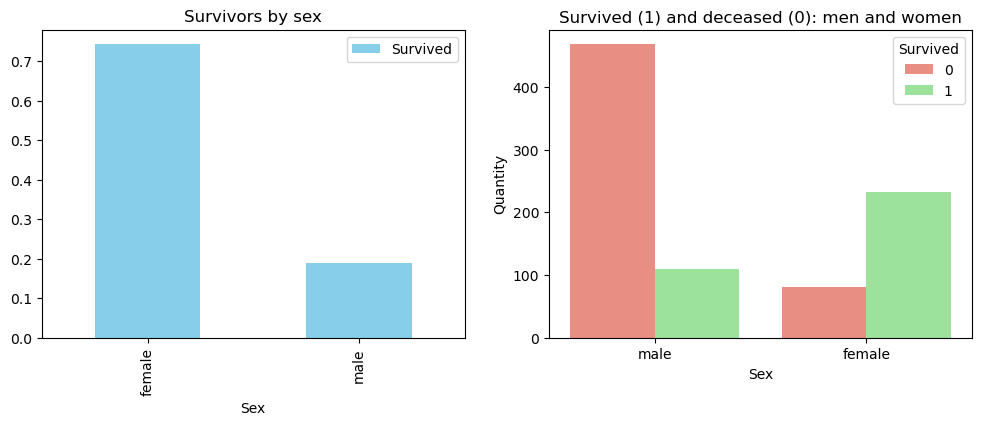

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(12, 4))

# --- Bar plot (mean survival by sex) ---
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(
    ax=ax[0],
    color=['skyblue', 'pink']   # colors for female, male bars
)
ax[0].set_title('Survivors by sex')

# --- Countplot (Male/Female vs Survived) ---
sns.countplot(
    x='Sex',
    hue='Survived',
    data=df,
    palette=['salmon', 'lightgreen'],  # 0 = salmon, 1 = lightgreen
    ax=ax[1]
)
ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')

plt.show()


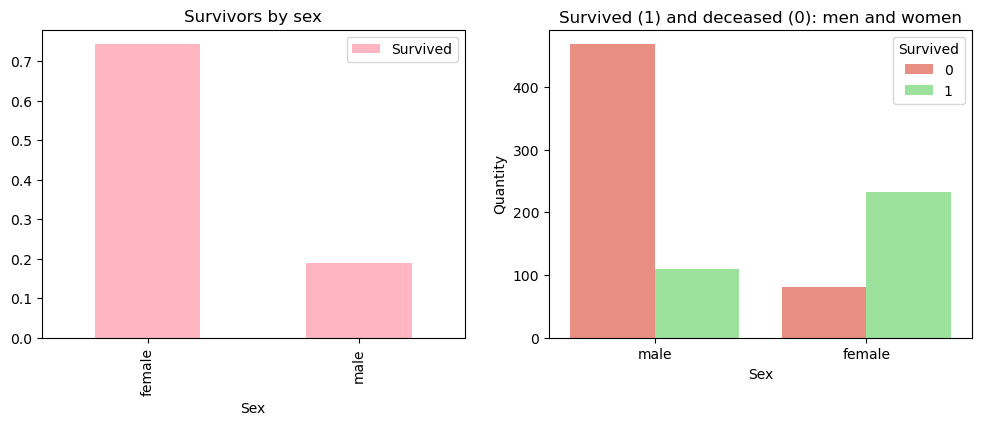

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot (average survival by sex)
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(
    ax=ax[0],
    color=['lightpink', 'skyblue']   # colors for female & male bars
)
ax[0].set_title('Survivors by sex')

# Countplot (sex vs survived)
sns.countplot(
    x='Sex',
    hue='Survived',
    data=df,
    palette=['salmon', 'lightgreen'],   # 0 = salmon, 1 = lightgreen
    ax=ax[1]
)

ax[1].set_ylabel('Quantity')
ax[1].set_title('Survived (1) and deceased (0): men and women')

plt.show()


In [28]:
sns.countplot(x='Pclass', data =df)

<Axes: xlabel='Pclass', ylabel='count'>

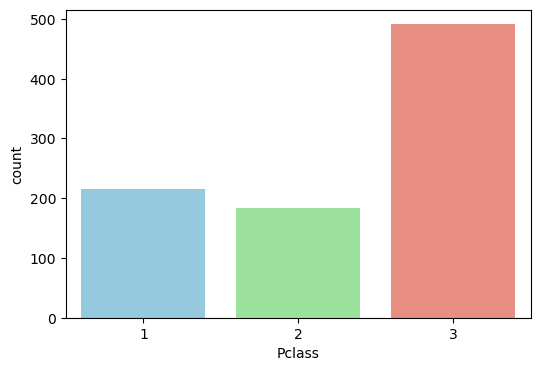

In [30]:
plt.figure(figsize=(6,4))

sns.countplot(
    x='Pclass',
    data=df,
    palette=['skyblue', 'lightgreen', 'salmon']   # colors for classes 1, 2, 3
)

plt.show()



In [31]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

<Figure size 640x480 with 0 Axes>

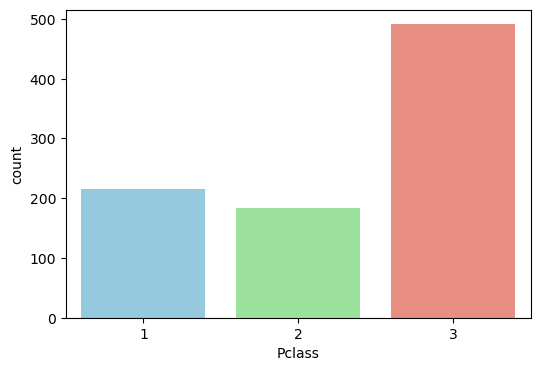

In [32]:
plt.clf()
plt.figure(figsize=(6,4))

sns.countplot(
    x='Pclass',
    data=df,
    palette=['skyblue', 'lightgreen', 'salmon']
)

plt.show()


In [33]:
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
plt.clf()

<Figure size 640x480 with 0 Axes>

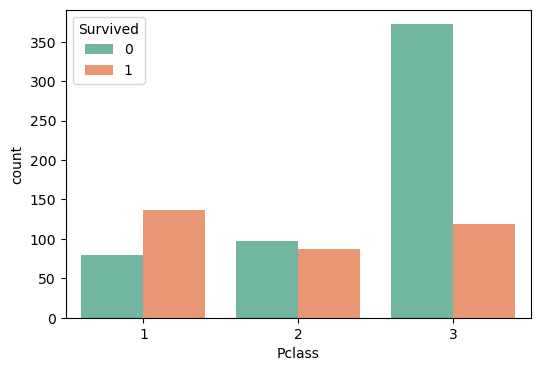

In [36]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.show()


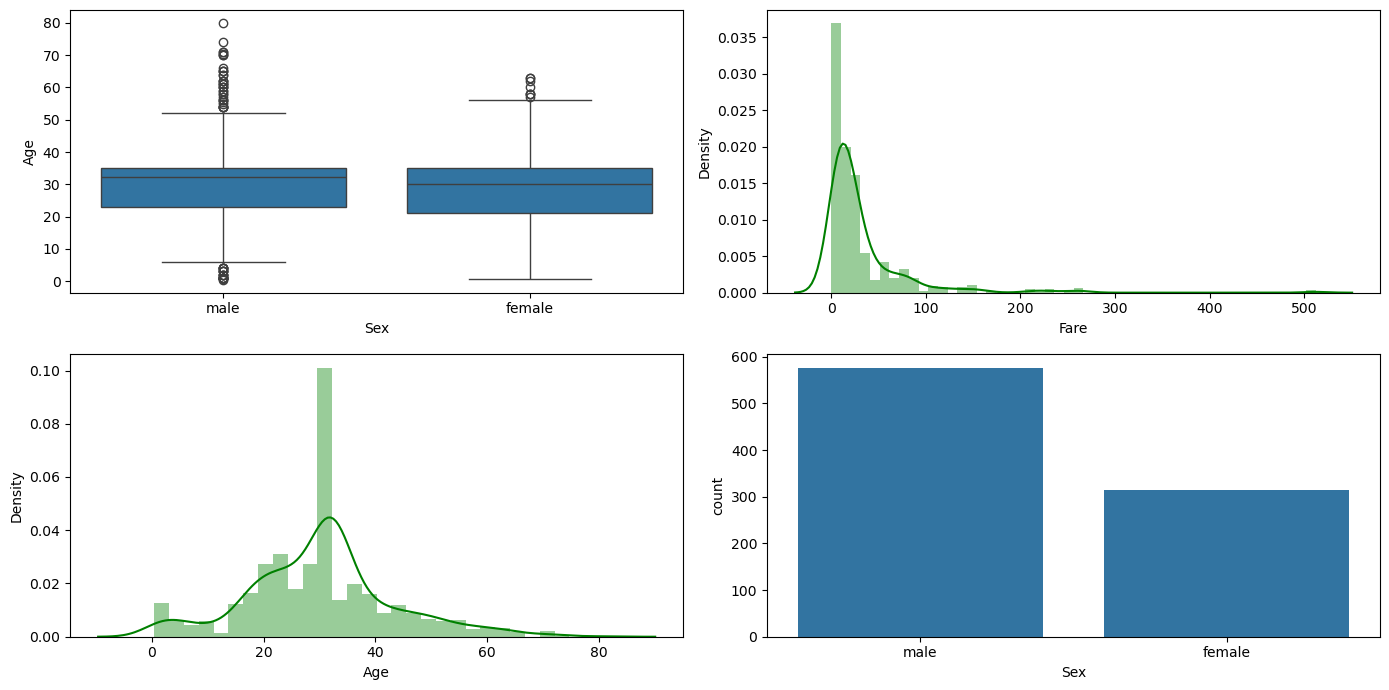

In [37]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex', y = 'Age', data=df)

plt.subplot(2,2,2)
sns.distplot(df['Fare'],color='g')

plt.subplot(2,2,3)
sns.distplot(df['Age'],color='g')

plt.subplot(2,2,4)
sns.countplot(x='Sex', data=df)

plt.tight_layout()
plt.show()

In [38]:
df['Embarked'].value_counts()

Embarked
S            644
C            168
Q             77
32.204208      2
Name: count, dtype: int64

In [39]:
df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


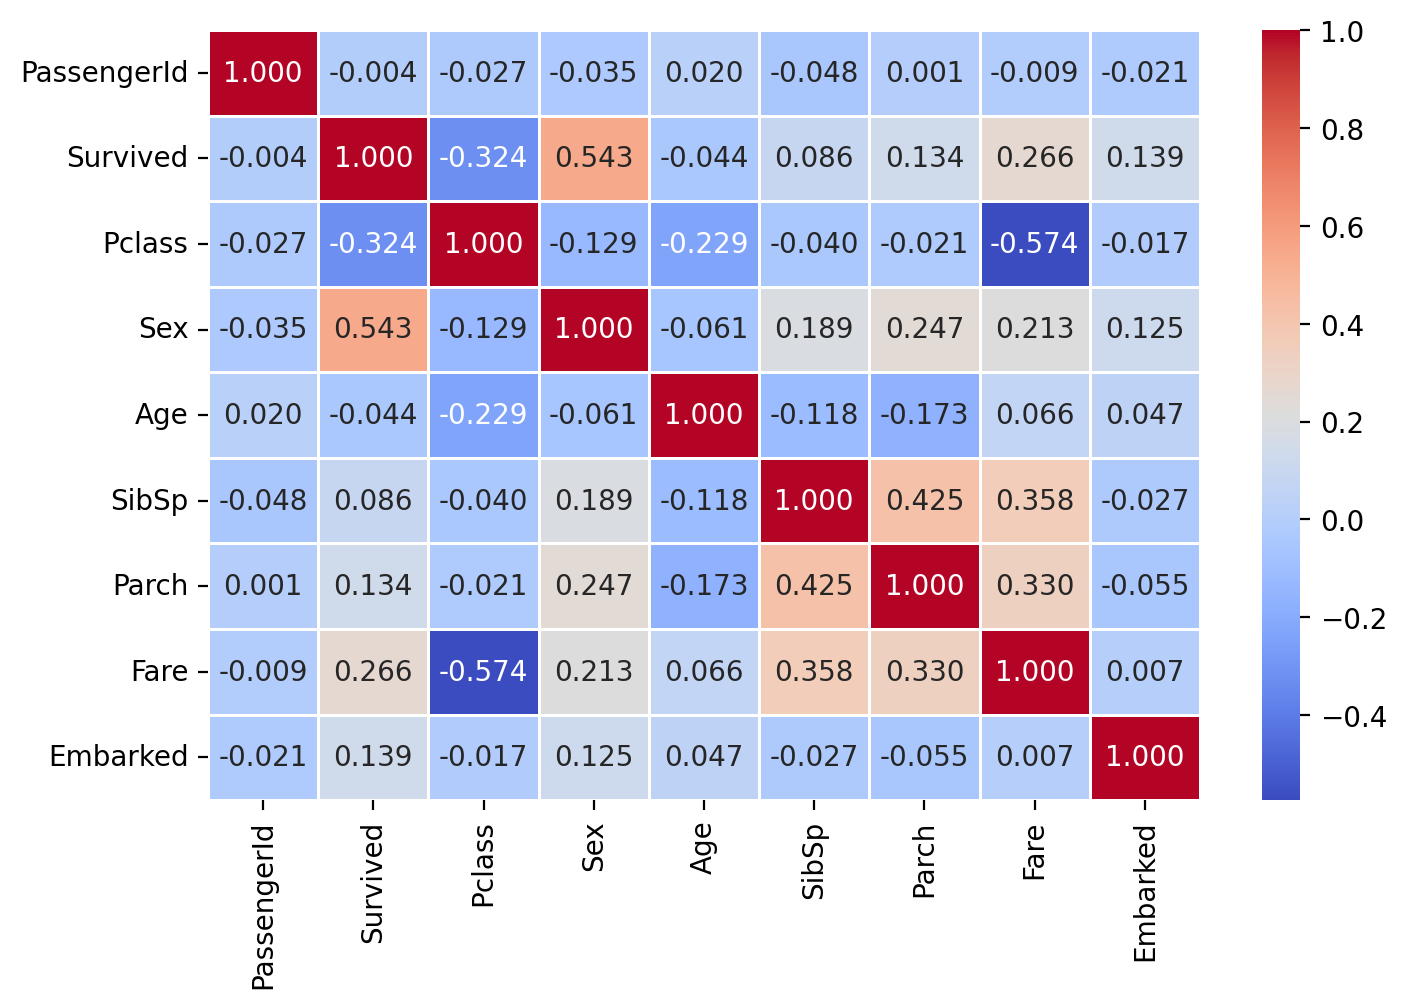

In [41]:
corr = df.corr(method="kendall", numeric_only=True)
plt.figure(figsize=(8,5), dpi=200)

sns.heatmap(
    corr,
    annot=True,
    fmt=".3f",
    linewidth=.5,
    cmap="coolwarm"
)

plt.show()



In [48]:
# Dropping non-essential features
X = df.drop(columns=['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

# confusion matrix
dtc_cm = confusion_matrix(y_test, dtc_pred)

# accuracy score
dtc_acc = accuracy_score(y_test, dtc_pred)

print(f'The confusion matrix is:\n{dtc_cm}\nThe accuracy is: {dtc_acc*100}%')


The confusion matrix is:
[[83 22]
 [24 50]]
The accuracy is: 74.30167597765363%


In [55]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
#the confusion matrix of the model
rfc_cm = confusion_matrix(y_test,rfc_pred)
#the accuracy score of the model
rfc_acc = accuracy_score(y_test,rfc_pred)
print(f' The confusion matrix \n {rfc_cm} \n and the accuracy is: {rfc_acc*100}%')

 The confusion matrix 
 [[95 10]
 [20 54]] 
 and the accuracy is: 83.24022346368714%


In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'].astype(str))


In [58]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [65]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')



In [66]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [69]:
df = df.drop(['PassengerId'], axis=1)


In [70]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [71]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [74]:
from sklearn.neighbors import KNeighborsClassifier

misclassified = []

for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    misclassified.append((y_test != pred).sum())

print(misclassified)


[np.int64(41), np.int64(36), np.int64(37), np.int64(39), np.int64(32), np.int64(36), np.int64(35), np.int64(36), np.int64(38), np.int64(35), np.int64(38), np.int64(37), np.int64(37), np.int64(35), np.int64(35), np.int64(36), np.int64(35), np.int64(34), np.int64(35)]


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

# confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred)

# accuracy score
knn_acc = accuracy_score(y_test, knn_pred)

print(f"The confusion matrix is:\n{knn_cm}\nThe accuracy is: {round(knn_acc * 100, 2)}%")


The confusion matrix is:
[[93 12]
 [24 50]]
The accuracy is: 79.89%


In [77]:
# Support Vector Machine Model
from sklearn.svm import SVC
svm = SVC(kernel='linear',random_state=42)
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)
#the confusion matrix of the model
svm_cm = confusion_matrix(y_test,svm_pred)
#the accuracy score of the model
svm_acc = accuracy_score(y_test,svm_pred)
print(f"The confusion matrix is \n{svm_cm} with the accuracy is {svm_acc}")

The confusion matrix is 
[[88 17]
 [22 52]] with the accuracy is 0.7821229050279329
